C:\Users\Mathiako\AppData\Local\Temp\ipykernel_18972\512156432.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


The dataset ranges from 2022-03-15 07:25:05 to 2022-05-30 09:37:21


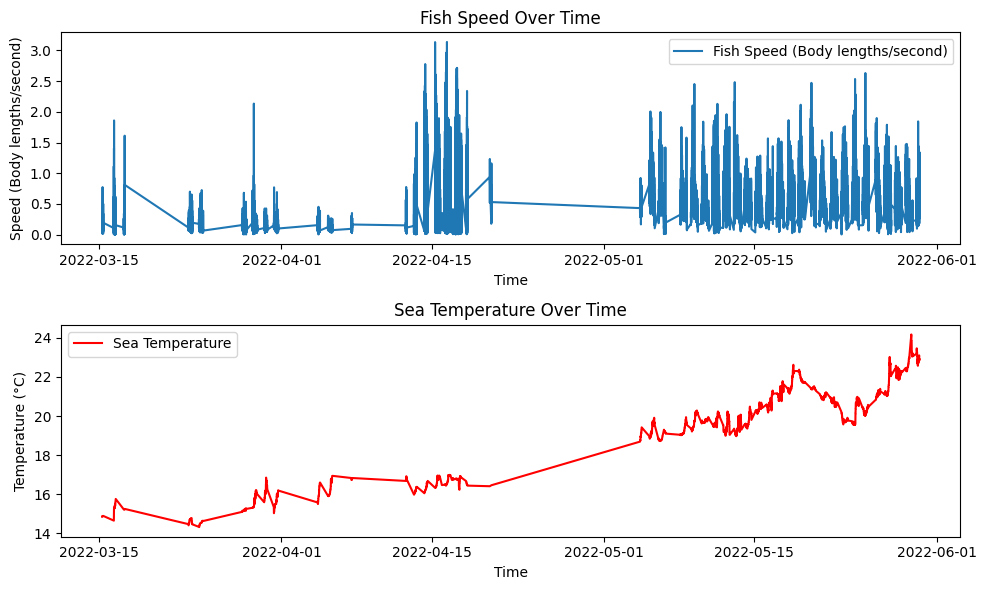

In [144]:
#Seabass data from Nikos
import pandas as pd
import matplotlib.pyplot as plt

#File path
csv_file_path = r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\fish_data2_decimals.csv'


df = pd.read_csv(
    csv_file_path, 
    sep=';', 
    decimal=',',
    parse_dates=['observed At:'],
    dayfirst=False,
    index_col='observed At:'
)

min_date = df.index.min()
max_date = df.index.max()
print(f"The dataset ranges from {min_date} to {max_date}")


df.columns = df.columns.str.strip()

df['fish Speed (Body lengths/second)'] = pd.to_numeric(
    df['fish Speed (Body lengths/second)'].astype(str).str.replace(',', '.'),
    errors='coerce'
)
df['temperature'] = pd.to_numeric(
    df['temperature'].astype(str).str.replace(',', '.'),
    errors='coerce'
)


plt.figure(figsize=(10, 6))

#Fish speed plot
plt.subplot(2, 1, 1) 
plt.plot(df.index, df['fish Speed (Body lengths/second)'], label='Fish Speed (Body lengths/second)')
plt.title('Fish Speed Over Time')
plt.ylabel('Speed (Body lengths/second)')
plt.xlabel('Time')
plt.legend()

#Temperature plot
plt.subplot(2, 1, 2)  
plt.plot(df.index, df['temperature'], label='Sea Temperature', color='red')
plt.title('Sea Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Mathiako\AppData\Local\Temp\ipykernel_18972\2591608435.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


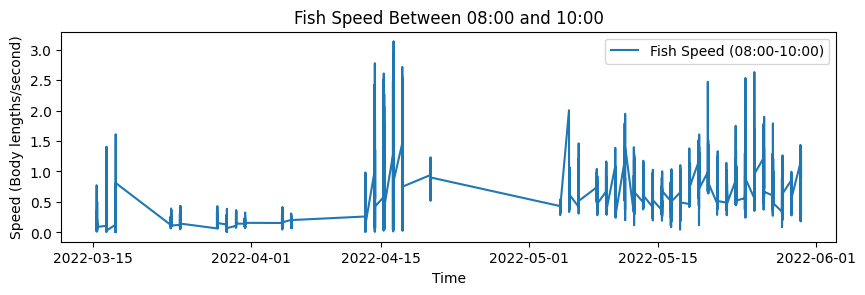

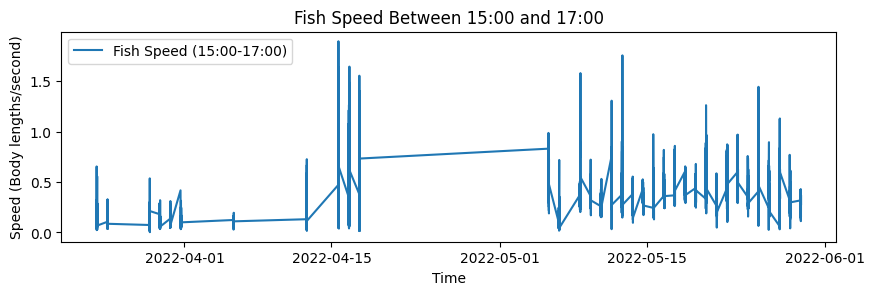

The average fish speed between 08:00 and 10:00 is: 0.71 body lengths/second
The average fish speed between 11:00 and 13:00 is: 0.48 body lengths/second
The average fish speed between 15:00 and 17:00 is: 0.45 body lengths/second
The average fish speed between 00:00 and 02:00 is: 0.48 body lengths/second


In [145]:
#Nikos data, average fish speed between daytime intervals

import pandas as pd
import matplotlib.pyplot as plt


csv_file_path = r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\fish_data2_decimals.csv'

df = pd.read_csv(
    csv_file_path, 
    sep=';', 
    decimal=',',
    parse_dates=['observed At:'],
    dayfirst=False,
    index_col='observed At:'
)

df.columns = df.columns.str.strip()

df['fish Speed (Body lengths/second)'] = pd.to_numeric(
    df['fish Speed (Body lengths/second)'].astype(str).str.replace(',', '.'),
    errors='coerce'
)

morning_df = df.between_time('08:00', '10:00')

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(morning_df.index, morning_df['fish Speed (Body lengths/second)'], label='Fish Speed (08:00-10:00)')
plt.title('Fish Speed Between 08:00 and 10:00')
plt.xlabel('Time')
plt.ylabel('Speed (Body lengths/second)')
plt.legend()
plt.show()

afternoon_df = df.between_time('15:00', '17:00')

#Plot the fish speed for the filtered time period
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(afternoon_df.index, afternoon_df['fish Speed (Body lengths/second)'], label='Fish Speed (15:00-17:00)')
plt.title('Fish Speed Between 15:00 and 17:00')
plt.xlabel('Time')
plt.ylabel('Speed (Body lengths/second)')
plt.legend()
plt.show()

noon_df = df.between_time('11:00', '13:00')
night_df = df.between_time('00:00', '02:00')

#Calculate the average fish speed during this time period
average_speed2 = morning_df['fish Speed (Body lengths/second)'].mean()
print(f"The average fish speed between 08:00 and 10:00 is: {average_speed2:.2f} body lengths/second")

average_speed3 = noon_df['fish Speed (Body lengths/second)'].mean()
print(f"The average fish speed between 11:00 and 13:00 is: {average_speed3:.2f} body lengths/second")


average_speed = afternoon_df['fish Speed (Body lengths/second)'].mean()
print(f"The average fish speed between 15:00 and 17:00 is: {average_speed:.2f} body lengths/second")

average_speed4 = noon_df['fish Speed (Body lengths/second)'].mean()
print(f"The average fish speed between 00:00 and 02:00 is: {average_speed4:.2f} body lengths/second")


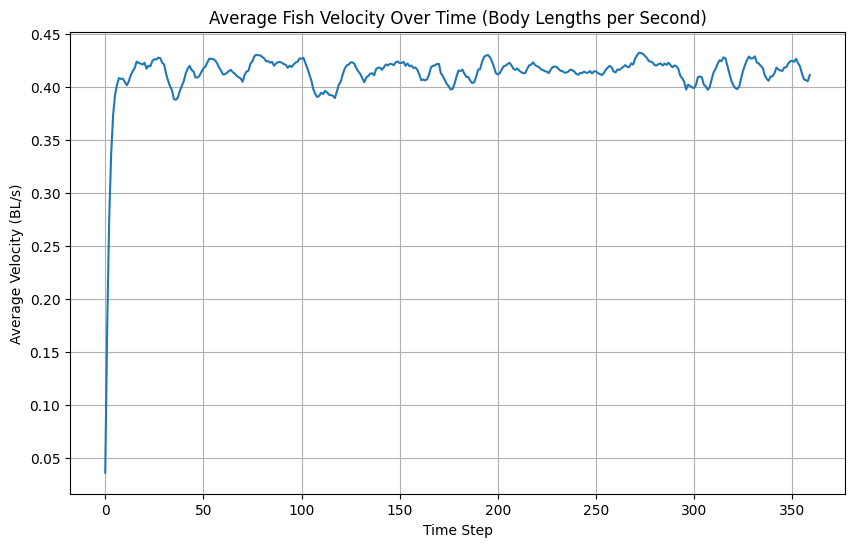

In [151]:
#Model data, average velocity of fish over time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test2.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

#Skip the first 10 time steps
#average_velocity_per_step_bl_s = average_velocity_per_step_bl_s.iloc[10:]

plt.figure(figsize=(10, 6))
average_velocity_per_step_bl_s.plot()
plt.title('Average Fish Velocity Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Average Velocity (BL/s)')
plt.grid(True)
plt.show()


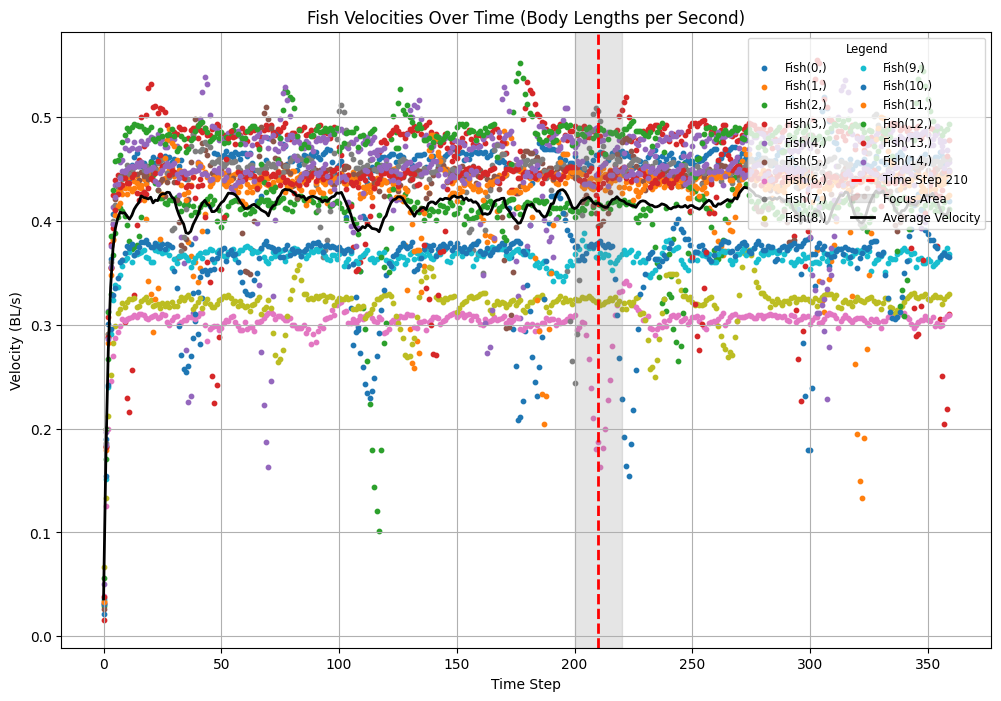

In [1]:
#Model data, induvidual and average velocity of fish over time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test2.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

# Add a vertical line at time step 210
plt.axvline(x=210, color='r', linestyle='--', linewidth=2, label='Time Step 210')
time_step_focus = 210
range_width = 10  
plt.axvspan(time_step_focus - range_width, time_step_focus + range_width, color='grey', alpha=0.2, label='Focus Area')

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
plt.legend(loc='upper right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()


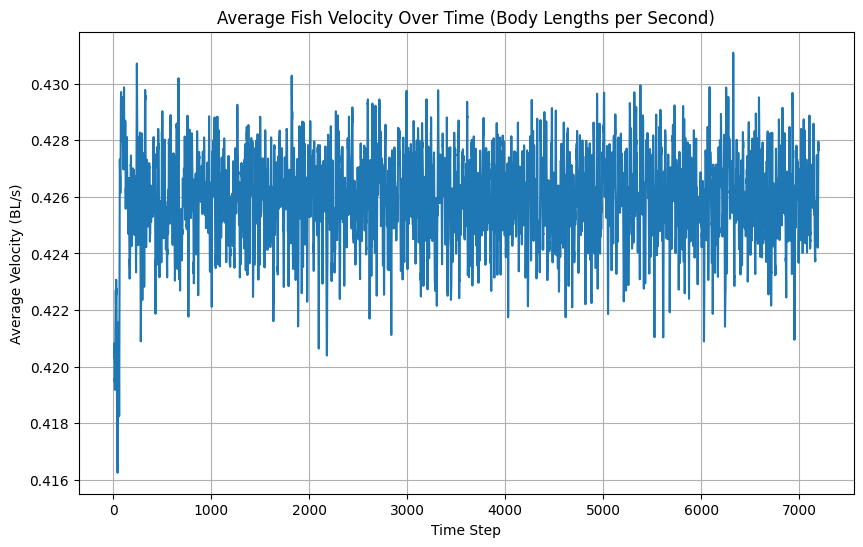

In [149]:
#Model data, average velocity of fish over time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test1.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

#Skip the first 10 time steps
average_velocity_per_step_bl_s = average_velocity_per_step_bl_s.iloc[10:]

plt.figure(figsize=(10, 6))
average_velocity_per_step_bl_s.plot()
plt.title('Average Fish Velocity Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Average Velocity (BL/s)')
plt.grid(True)
plt.show()



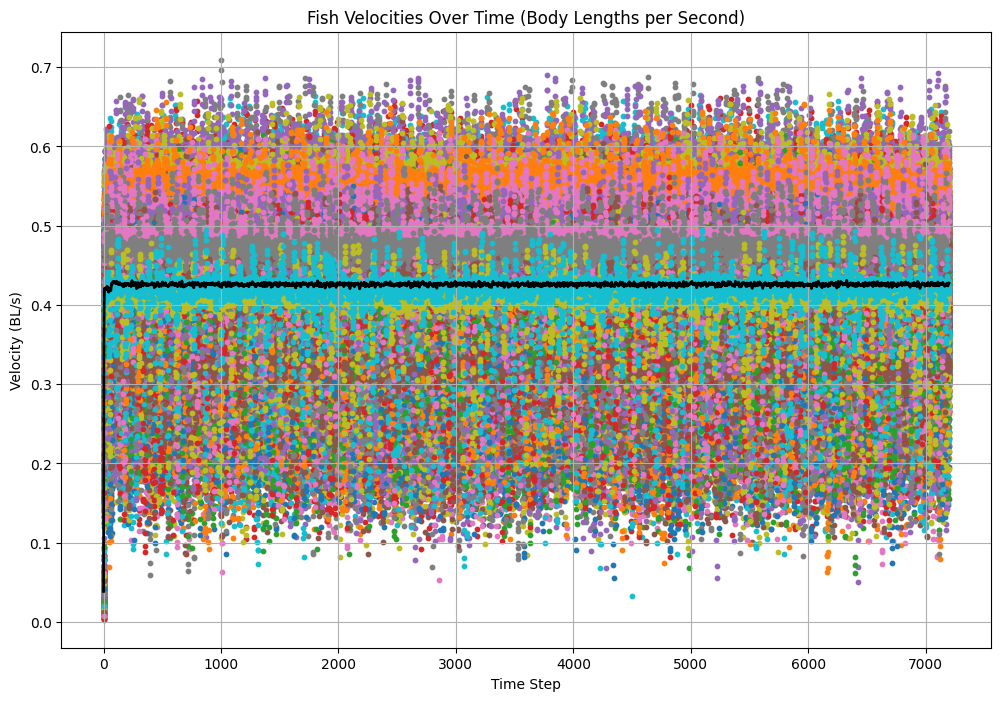

In [139]:
#Model data, induvidual and average velocity of fish over time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test1.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
#plt.legend(loc='upper right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()



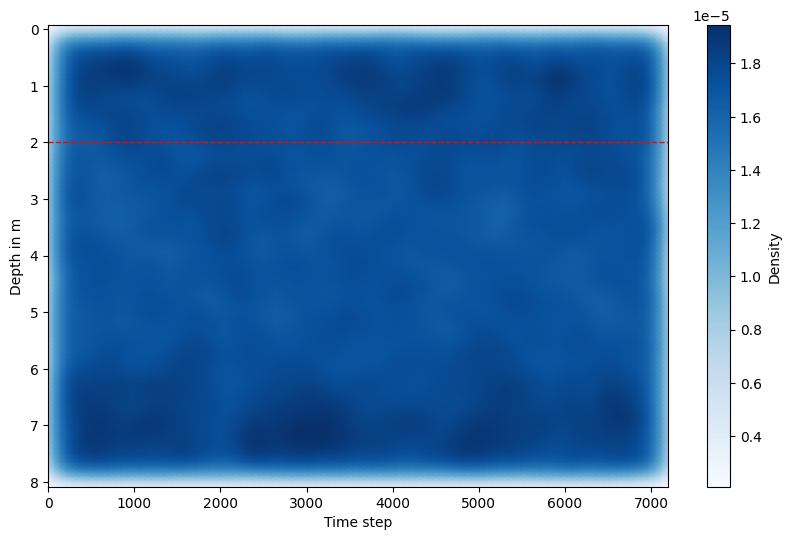

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\afternoon_test1.csv')

nbins = 100  #The number of bins for the KDE, affecting smoothness of the density plot

depth = fish_data['pos_z']
time_steps = fish_data['time_step']

fig, ax = plt.subplots(figsize=(10, 6))

#Calculate the Gaussian KDE
k = stats.gaussian_kde([time_steps, depth])
xi, yi = np.mgrid[time_steps.min():time_steps.max():nbins*1j, depth.min():depth.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


cax = ax.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Blues)
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('Density')

ax.invert_yaxis()

# Set axis labels
ax.set_xlabel('Time step')
ax.set_ylabel('Depth in m')

ax.hlines(y=2, xmin=time_steps.min(), xmax=time_steps.max(), linewidth=1, color='r', linestyle='--')

plt.show()


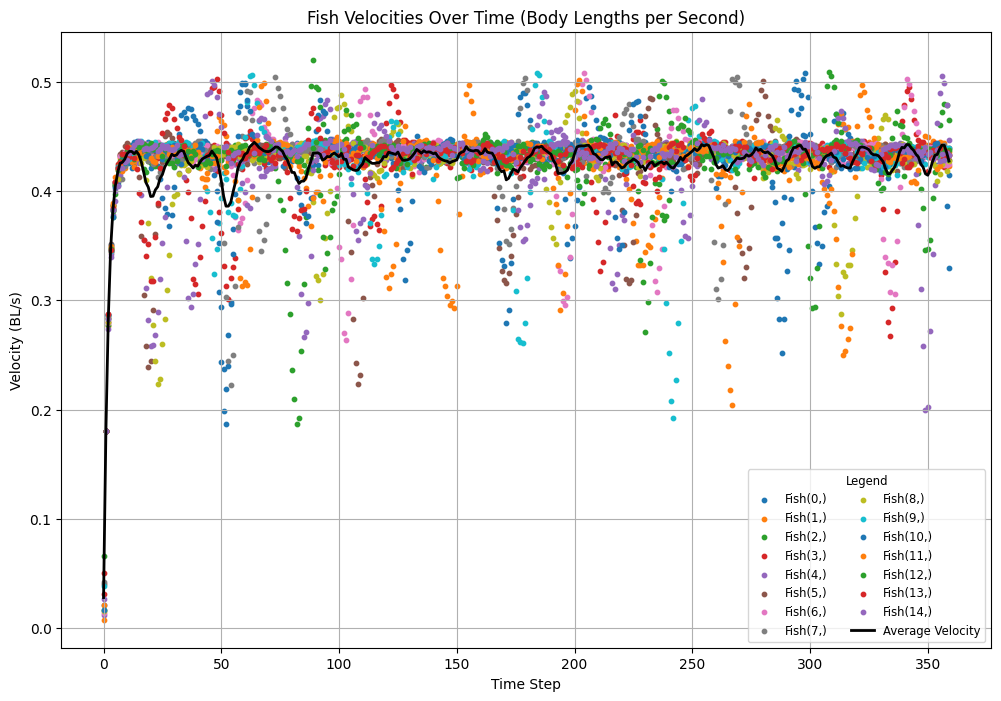

In [38]:
#Model data, induvidual and average velocity of fish over time
#With 0 random characteristic speed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\sensitivity_random_speed.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()


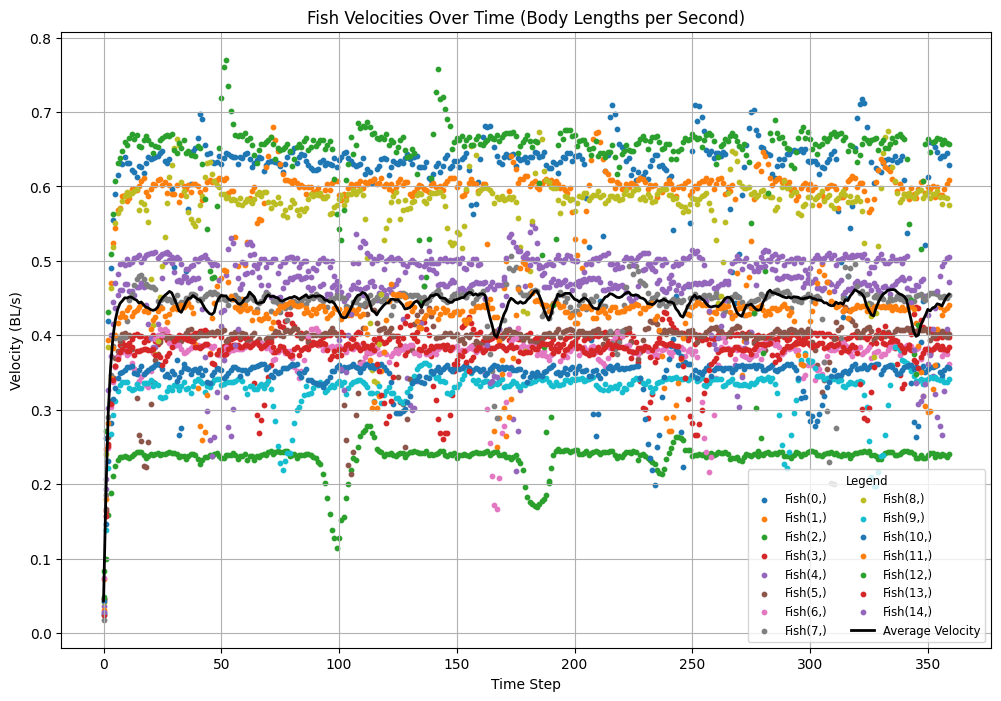

In [39]:
#Model data, induvidual and average velocity of fish over time
#With 0.1* np.random.normal(), random characteristic speed
#The np.random.normal() function generates a random float drawn from a standard normal distribution 
#(mean of 0 and standard deviation of 1).
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\sensitivity_random_speed2.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()

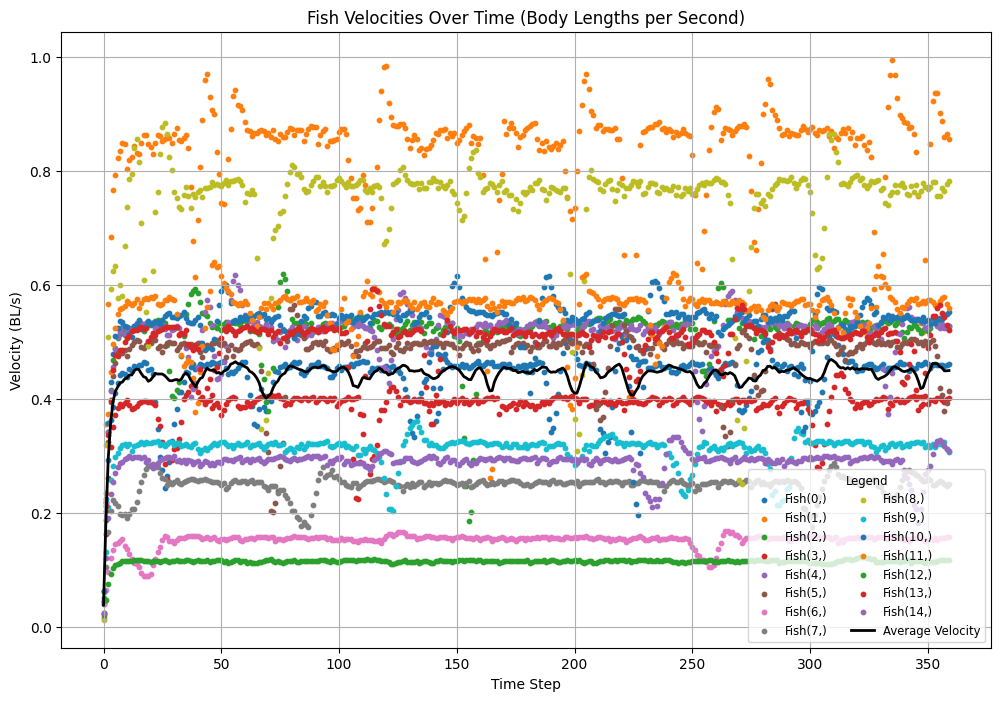

In [56]:
#Model data, induvidual and average velocity of fish over time
#With 0.2* np.random.normal(), random characteristic speed
#The np.random.normal() function generates a random float drawn from a standard normal distribution 
#(mean of 0 and standard deviation of 1).
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\sensitivity_random_speed3.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()

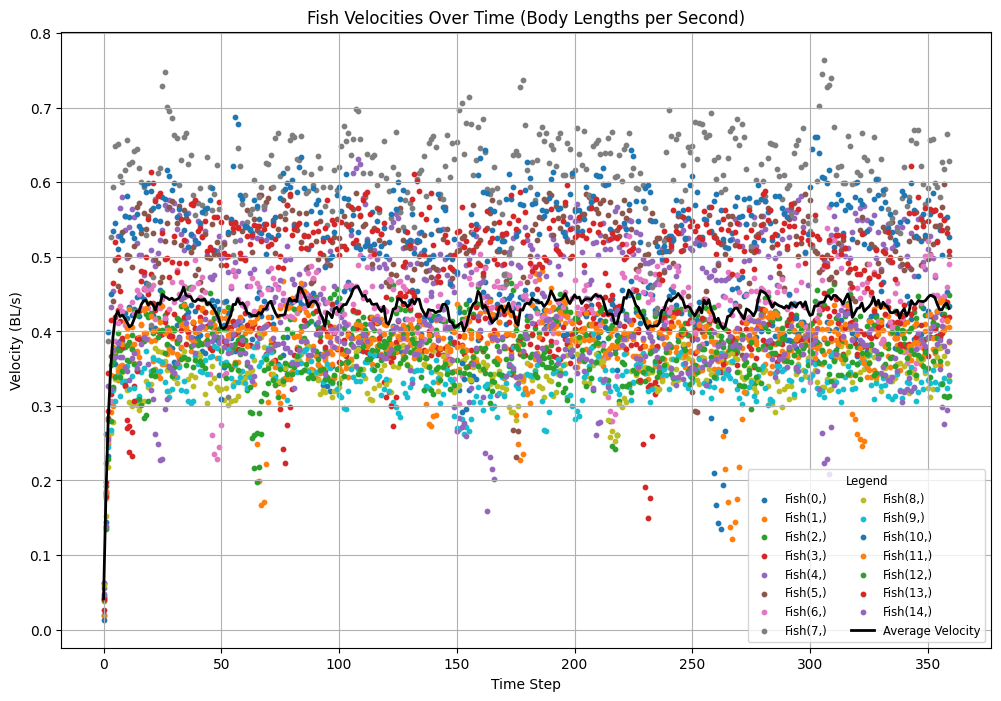

In [78]:
#Model data, induvidual and average velocity of fish over time
# 15 fish, 360 timesteps, np.random.uniform(0.8, 1.2)*characteristic_speed 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\test_random.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()

C:\Users\Mathiako\AppData\Local\Temp\ipykernel_16728\512156432.py:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



The dataset ranges from 2022-03-15 07:25:05 to 2022-05-30 09:37:21


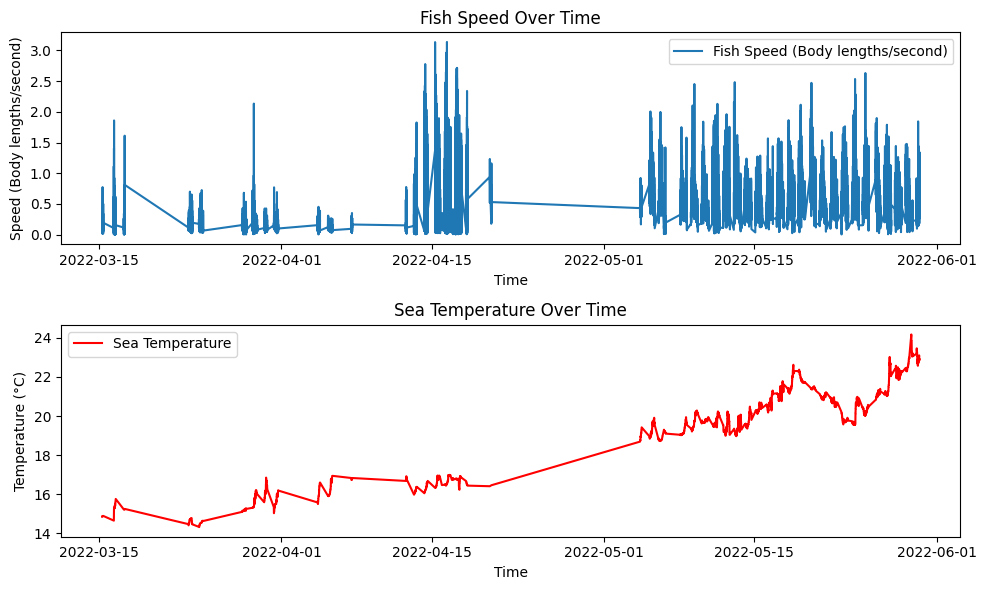

In [63]:
#Seabass data from Nikos
import pandas as pd
import matplotlib.pyplot as plt

#File path
csv_file_path = r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\fish_data2_decimals.csv'


df = pd.read_csv(
    csv_file_path, 
    sep=';', 
    decimal=',',
    parse_dates=['observed At:'],
    dayfirst=False,
    index_col='observed At:'
)

min_date = df.index.min()
max_date = df.index.max()
print(f"The dataset ranges from {min_date} to {max_date}")


df.columns = df.columns.str.strip()

df['fish Speed (Body lengths/second)'] = pd.to_numeric(
    df['fish Speed (Body lengths/second)'].astype(str).str.replace(',', '.'),
    errors='coerce'
)
df['temperature'] = pd.to_numeric(
    df['temperature'].astype(str).str.replace(',', '.'),
    errors='coerce'
)


plt.figure(figsize=(10, 6))

#Fish speed plot
plt.subplot(2, 1, 1) 
plt.plot(df.index, df['fish Speed (Body lengths/second)'], label='Fish Speed (Body lengths/second)')
plt.title('Fish Speed Over Time')
plt.ylabel('Speed (Body lengths/second)')
plt.xlabel('Time')
plt.legend()

#Temperature plot
plt.subplot(2, 1, 2)  
plt.plot(df.index, df['temperature'], label='Sea Temperature', color='red')
plt.title('Sea Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.legend()

plt.tight_layout()
plt.show()


Average Fish Speed from 08:00 to 10:00:
temp_range
(14, 15]    0.160363
(15, 16]    0.254224
(16, 17]    0.762413
(18, 19]    0.574035
(19, 20]    0.628476
(20, 21]    0.677257
(21, 22]    0.826000
(22, 23]    0.590827
(23, 24]    0.610901
Name: fish Speed (Body lengths/second), dtype: float64

Average Fish Speed from 14:00 to 18:00:
temp_range
(14, 15]    0.121862
(15, 16]    0.114559
(16, 17]    0.476224
(19, 20]    0.389474
(20, 21]    0.405780
(21, 22]    0.395894
(22, 23]    0.401711
(23, 24]    0.287530
Name: fish Speed (Body lengths/second), dtype: float64

Average Fish Speed from 06:00 to 22:00:
temp_range
(14, 15]    0.142803
(15, 16]    0.236278
(16, 17]    0.559446
(18, 19]    0.661000
(19, 20]    0.570558
(20, 21]    0.525866
(21, 22]    0.601827
(22, 23]    0.507945
(23, 24]    0.339731
Name: fish Speed (Body lengths/second), dtype: float64



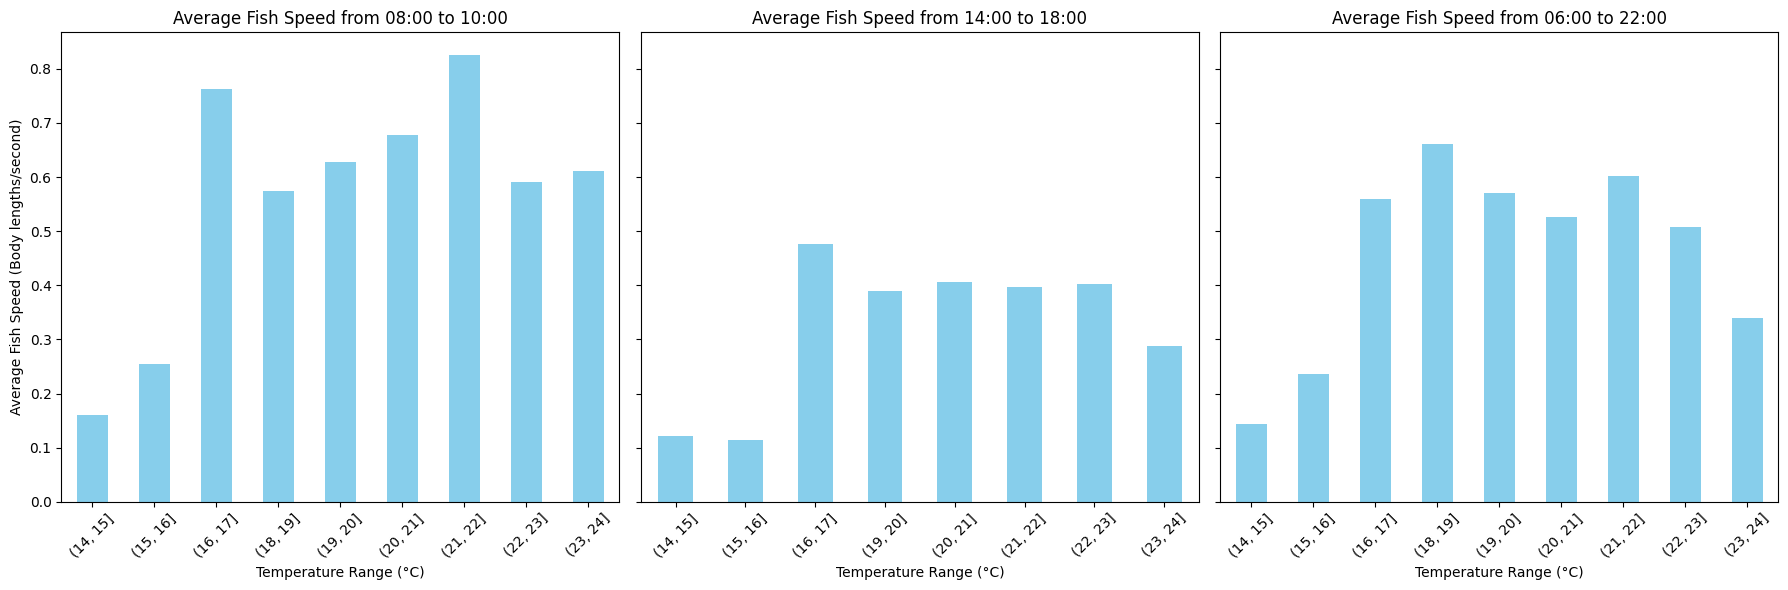

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Load data
csv_file_path = r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\fish_data2_decimals.csv'
df = pd.read_csv(
    csv_file_path, 
    sep=';', 
    decimal=',',
    parse_dates=['observed At:'],
    dayfirst=True,
    index_col='observed At:',
    date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S,%f')
)

df.columns = df.columns.str.strip()
df['fish Speed (Body lengths/second)'] = pd.to_numeric(
    df['fish Speed (Body lengths/second)'].astype(str).str.replace(',', '.'),
    errors='coerce'
)
df['temperature'] = pd.to_numeric(
    df['temperature'].astype(str).str.replace(',', '.'),
    errors='coerce'
)

#Define temperature bins
temperature_bins = range(14, 25, 1)  # Adjust the range and step as necessary

# Time ranges for the subplots
time_ranges = [('08:00', '10:00'), ('14:00', '18:00'), ('06:00', '22:00')]

fig, axes = plt.subplots(nrows=1, ncols=len(time_ranges), figsize=(18, 6), sharey=True)

for i, (time_start, time_end) in enumerate(time_ranges):
    # Filter data by time
    time_filtered_df = df.between_time(time_start, time_end)
    time_filtered_df.loc[:, 'temp_range'] = pd.cut(time_filtered_df['temperature'], bins=temperature_bins)

    avg_speed_per_temp_range = time_filtered_df.groupby('temp_range', observed=True)['fish Speed (Body lengths/second)'].mean()

    print(f'Average Fish Speed from {time_start} to {time_end}:')
    print(avg_speed_per_temp_range)
    print()

    #Plotting on the subplot
    ax = axes[i]
    avg_speed_per_temp_range.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Average Fish Speed from {time_start} to {time_end}')
    ax.set_xlabel('Temperature Range (°C)')
    ax.set_xticklabels(avg_speed_per_temp_range.index.astype(str), rotation=45)
    if i == 0:
        ax.set_ylabel('Average Fish Speed (Body lengths/second)')
    
plt.tight_layout()
plt.show()


Mean Squared Error: 0.06714045385768731
R-Squared: 0.01886752914282297


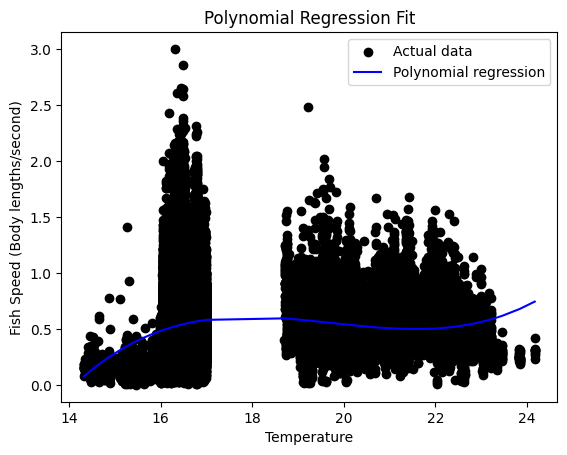

In [239]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data with semicolon separator and replace comma decimals with dots
data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\fish_data2_decimals.csv', delimiter=';', decimal=',')

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
data[['temperature', 'fish Speed (Body lengths/second)']] = imputer.fit_transform(data[['temperature', 'fish Speed (Body lengths/second)']])

# Assume the columns are named correctly based on your confirmation
X = data['temperature'].values.reshape(-1, 1)  # Predictor variable
y = data['fish Speed (Body lengths/second)']   # Response variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create polynomial features
degree = 3  # You can adjust the degree of the polynomial based on the dataset and requirements
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Fit the regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict using the model
y_pred = model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual data')
sorted_order = np.argsort(X_test.ravel())
plt.plot(X_test[sorted_order], y_pred[sorted_order], color='blue', label='Polynomial regression')
plt.xlabel('Temperature')
plt.ylabel('Fish Speed (Body lengths/second)')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()


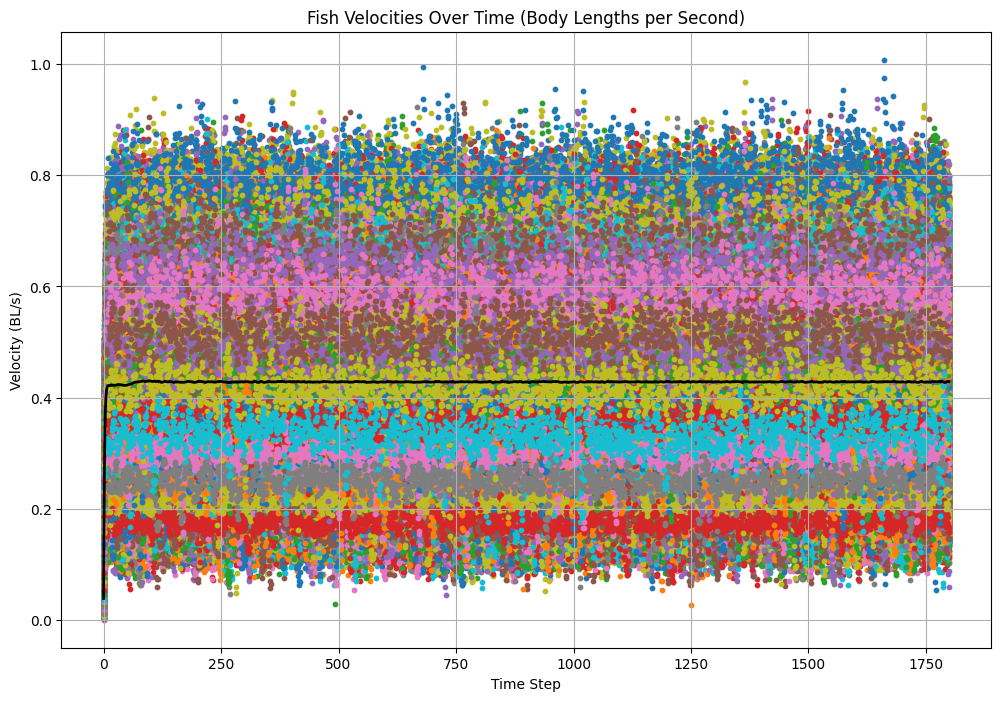

In [79]:
#Model data, induvidual and average velocity of fish over time
#10000 fish, 1800 timesteps, random characteristic speed and uniform random change in charicteristic speed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\test_10000.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
#plt.legend(loc='upper right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()

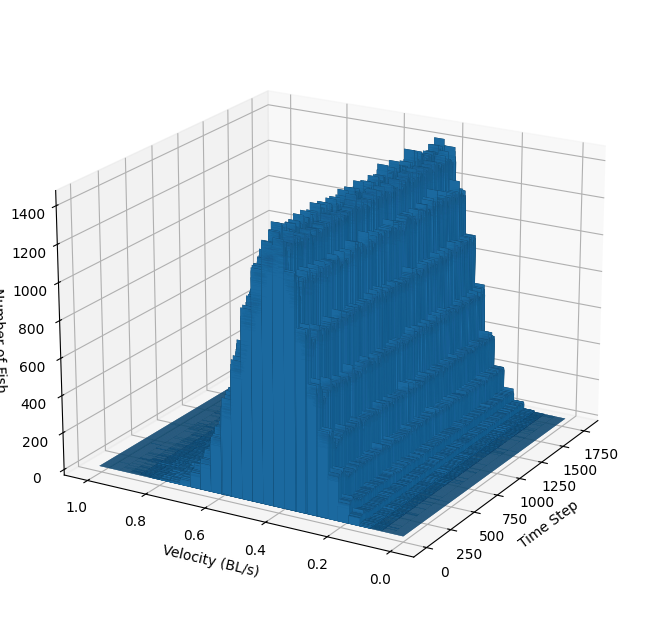

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\test_10000.csv')

#Filter out the first 10 time steps
fish_data = fish_data[fish_data['time_step'] > 10]

# Compute velocity magnitudes and convert to body lengths per second
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

# Define velocity bins ensuring they reflect the actual data range
velocity_bins = np.linspace(0, fish_data['velocity_bl_s'].max(), num=30)

# Create and plot the histogram
hist3d = np.zeros((len(velocity_bins)-1, len(fish_data['time_step'].unique())))

for i, step in enumerate(fish_data['time_step'].unique()):
    hist, _ = np.histogram(fish_data[fish_data['time_step'] == step]['velocity_bl_s'], bins=velocity_bins)
    hist3d[:, i] = hist

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x_pos, y_pos = np.meshgrid(range(len(fish_data['time_step'].unique())), velocity_bins[:-1])
ax.bar3d(x_pos.ravel(), y_pos.ravel(), np.zeros_like(x_pos).ravel(), 1, velocity_bins[1] - velocity_bins[0], hist3d.ravel()) #color='teal')

ax.view_init(elev=20, azim=210)  # Adjust these angles to get the best view

ax.set_xlabel('Time Step')
ax.set_ylabel('Velocity (BL/s)')
ax.set_zlabel('Number of Fish')
plt.show()

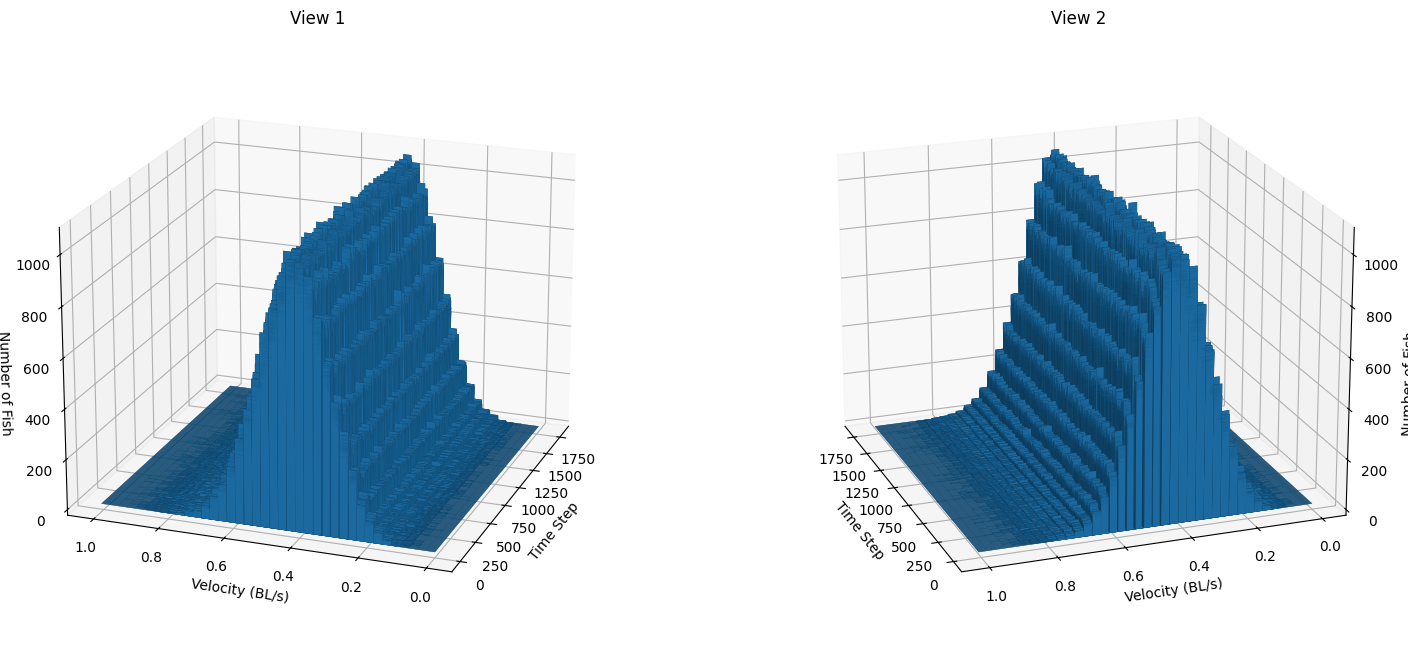

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\test_10000.csv')

#Filter out the first 10 time steps
fish_data = fish_data[fish_data['time_step'] > 10]

# Compute velocity magnitudes and convert to body lengths per second
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

# Define velocity bins ensuring they reflect the actual data range
velocity_bins = np.linspace(0, fish_data['velocity_bl_s'].max(), num=40)

# Create and plot the histogram
hist3d = np.zeros((len(velocity_bins)-1, len(fish_data['time_step'].unique())))

for i, step in enumerate(fish_data['time_step'].unique()):
    hist, _ = np.histogram(fish_data[fish_data['time_step'] == step]['velocity_bl_s'], bins=velocity_bins)
    hist3d[:, i] = hist

# Setting up the figure and axes
fig = plt.figure(figsize=(18, 8))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
x_pos, y_pos = np.meshgrid(range(len(fish_data['time_step'].unique())), velocity_bins[:-1])
ax1.bar3d(x_pos.ravel(), y_pos.ravel(), np.zeros_like(x_pos).ravel(), 1, velocity_bins[1] - velocity_bins[0], hist3d.ravel())
ax1.view_init(elev=20, azim=200)
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Velocity (BL/s)')
ax1.set_zlabel('Number of Fish')
ax1.set_title('View 1')

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.bar3d(x_pos.ravel(), y_pos.ravel(), np.zeros_like(x_pos).ravel(), 1, velocity_bins[1] - velocity_bins[0], hist3d.ravel())
ax2.view_init(elev=20, azim=160)
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Velocity (BL/s)')
ax2.set_zlabel('Number of Fish')
ax2.set_title('View 2')

plt.show() 

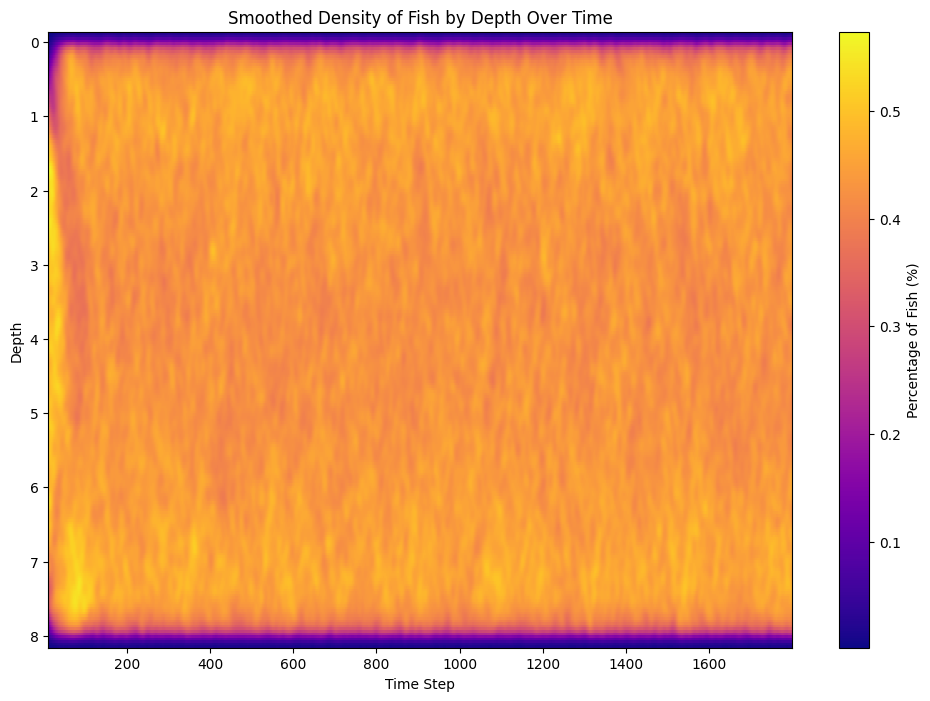

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\test_10000.csv')

# Filter out the first 10 time steps
fish_data = fish_data[fish_data['time_step'] > 10]

# Define depth bins
depth_bins = np.linspace(fish_data['pos_z'].min(), fish_data['pos_z'].max(), num=240)

# Create histogram data and normalize it to percentage
hist2d = np.zeros((len(depth_bins)-1, len(fish_data['time_step'].unique())))
time_steps = sorted(fish_data['time_step'].unique())

for i, step in enumerate(time_steps):
    hist, _ = np.histogram(fish_data[fish_data['time_step'] == step]['pos_z'], bins=depth_bins)
    total_count = hist.sum()
    hist2d[:, i] = (hist / total_count) * 100  # Convert counts to percentage

# Apply Gaussian smoothing
smoothed_hist2d = gaussian_filter(hist2d, sigma=[2, 5])  # Adjust sigma for smoothing depth and time

# Plotting as a smoothed heatmap
fig, ax = plt.subplots(figsize=(12, 8))
c = ax.imshow(smoothed_hist2d, aspect='auto', interpolation='nearest', origin='lower', extent=[fish_data['time_step'].min(), fish_data['time_step'].max(), depth_bins.min(), depth_bins.max()], cmap='plasma')
ax.invert_yaxis()
fig.colorbar(c, ax=ax, label='Percentage of Fish (%)')

ax.set_xlabel('Time Step')
ax.set_ylabel('Depth')
ax.set_title('Smoothed Density of Fish by Depth Over Time')
plt.show()

#Cut out top and bottom? No fish there

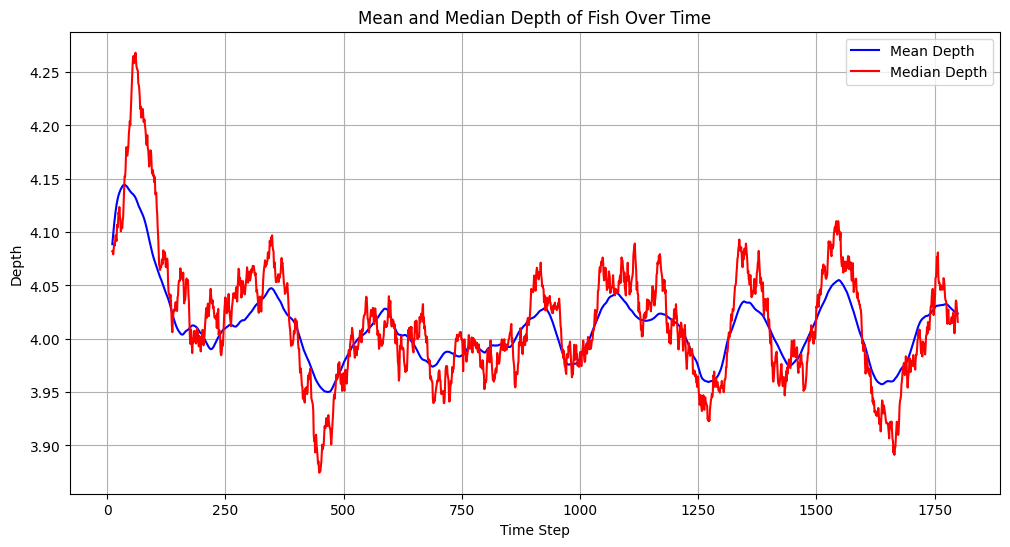

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\test_10000.csv')

# Filter out the first 10 time steps if needed
fish_data = fish_data[fish_data['time_step'] > 10]

mean_depths = fish_data.groupby('time_step')['pos_z'].mean()
median_depths = fish_data.groupby('time_step')['pos_z'].median()

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean depths
plt.plot(mean_depths.index, mean_depths.values, label='Mean Depth', color='blue')
# Plot median depths
plt.plot(median_depths.index, median_depths.values, label='Median Depth', color='red')

plt.title('Mean and Median Depth of Fish Over Time')
plt.xlabel('Time Step')
plt.ylabel('Depth')
plt.legend()
plt.grid(True)
plt.show()


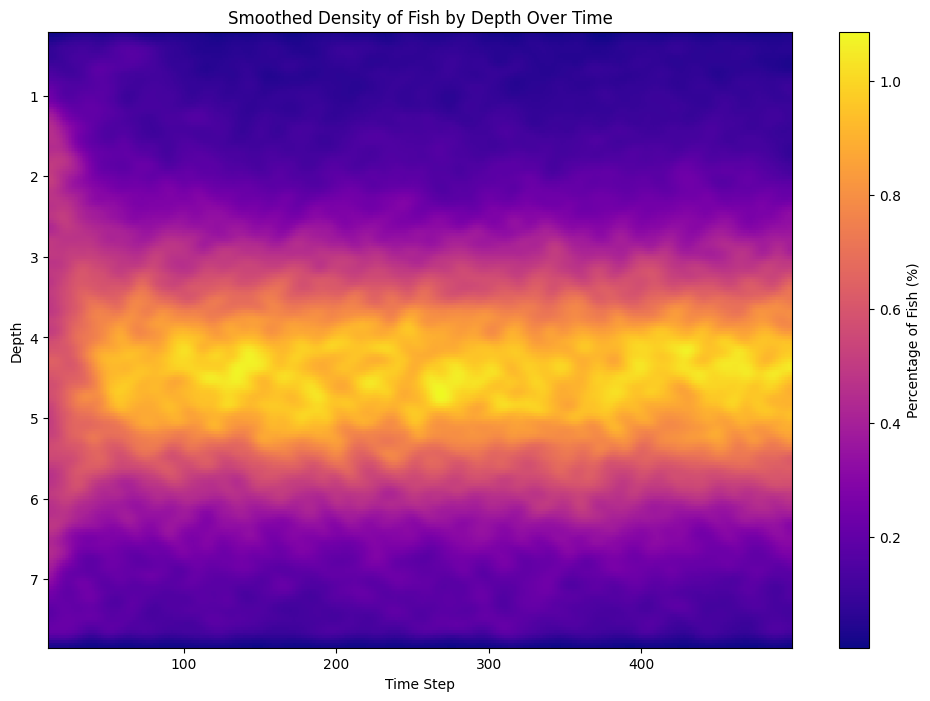

In [232]:
#3000 fish. 500 timesteps. 50% free will, afternoon

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\density_testing.csv')

# Filter out the first 10 time steps
fish_data = fish_data[fish_data['time_step'] > 10]

# Define depth bins
depth_bins = np.linspace(fish_data['pos_z'].min(), fish_data['pos_z'].max(), num=240)

# Create histogram data and normalize it to percentage
hist2d = np.zeros((len(depth_bins)-1, len(fish_data['time_step'].unique())))
time_steps = sorted(fish_data['time_step'].unique())

for i, step in enumerate(time_steps):
    hist, _ = np.histogram(fish_data[fish_data['time_step'] == step]['pos_z'], bins=depth_bins)
    total_count = hist.sum()
    hist2d[:, i] = (hist / total_count) * 100  # Convert counts to percentage

# Apply Gaussian smoothing
smoothed_hist2d = gaussian_filter(hist2d, sigma=[2, 5])  # Adjust sigma for smoothing depth and time

# Plotting as a smoothed heatmap
fig, ax = plt.subplots(figsize=(12, 8))
c = ax.imshow(smoothed_hist2d, aspect='auto', interpolation='nearest', origin='lower', extent=[fish_data['time_step'].min(), fish_data['time_step'].max(), depth_bins.min(), depth_bins.max()], cmap='plasma')
ax.invert_yaxis()
fig.colorbar(c, ax=ax, label='Percentage of Fish (%)')

ax.set_xlabel('Time Step')
ax.set_ylabel('Depth')
ax.set_title('Smoothed Density of Fish by Depth Over Time')
plt.show()


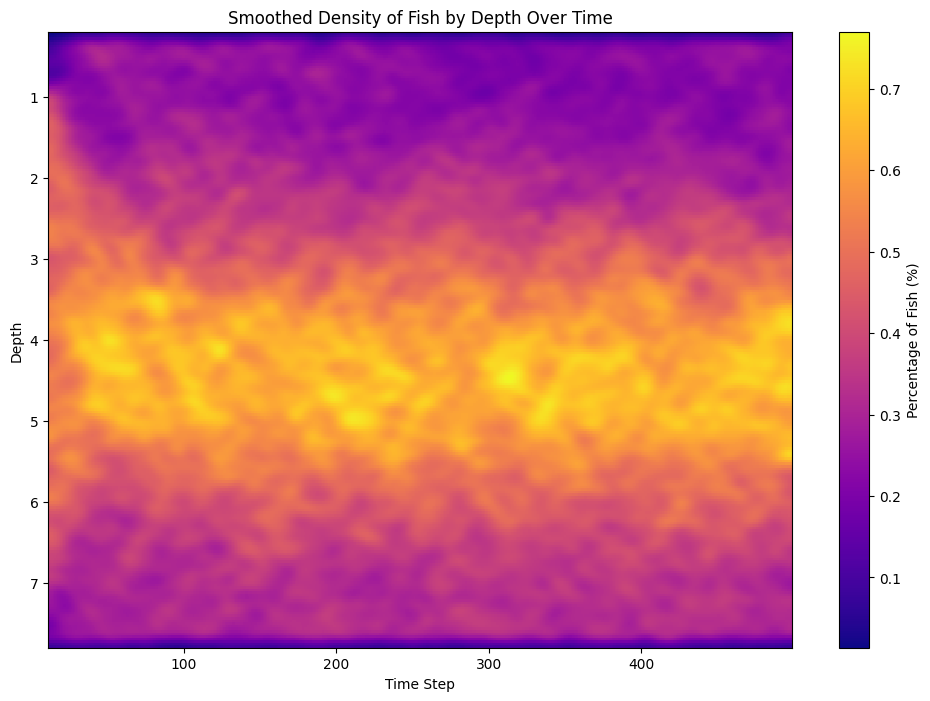

In [234]:
#3000 fish. 500 timesteps. 80% free will, afternoon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\density_noon.csv')

#Filter out the first 10 time steps
fish_data = fish_data[fish_data['time_step'] > 10]

#Define depth bins
depth_bins = np.linspace(fish_data['pos_z'].min(), fish_data['pos_z'].max(), num=240)

# Create histogram data and normalize it to percentage
hist2d = np.zeros((len(depth_bins)-1, len(fish_data['time_step'].unique())))
time_steps = sorted(fish_data['time_step'].unique())

for i, step in enumerate(time_steps):
    hist, _ = np.histogram(fish_data[fish_data['time_step'] == step]['pos_z'], bins=depth_bins)
    total_count = hist.sum()
    hist2d[:, i] = (hist / total_count) * 100  # Convert counts to percentage

# Apply Gaussian smoothing
smoothed_hist2d = gaussian_filter(hist2d, sigma=[2, 5])  # Adjust sigma for smoothing depth and time

# Plotting as a smoothed heatmap
fig, ax = plt.subplots(figsize=(12, 8))
c = ax.imshow(smoothed_hist2d, aspect='auto', interpolation='nearest', origin='lower', extent=[fish_data['time_step'].min(), fish_data['time_step'].max(), depth_bins.min(), depth_bins.max()], cmap='plasma')
ax.invert_yaxis()
fig.colorbar(c, ax=ax, label='Percentage of Fish (%)')

ax.set_xlabel('Time Step')
ax.set_ylabel('Depth')
ax.set_title('Smoothed Density of Fish by Depth Over Time')
plt.show()


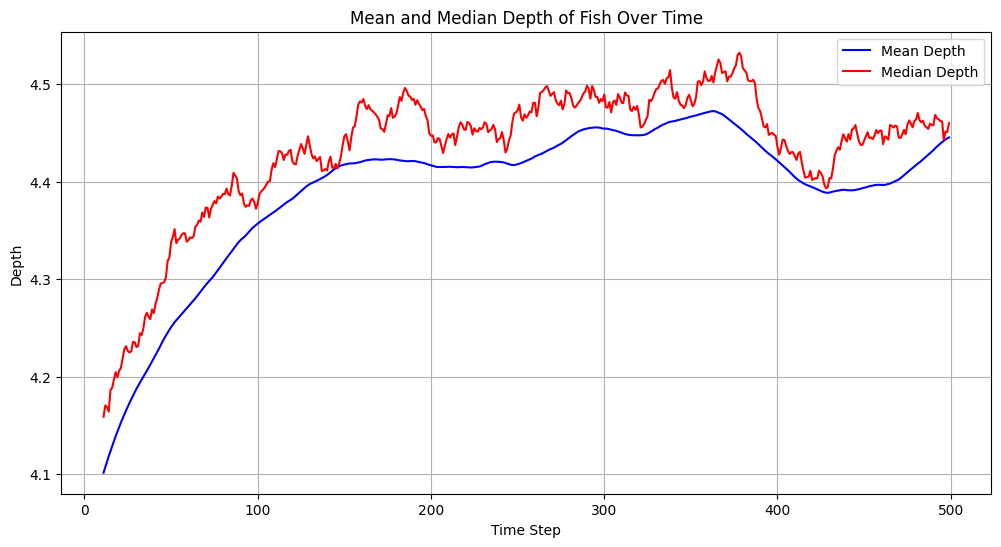

In [247]:
#3000 fish. 500 timesteps. 50% free will, afternoon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\density_testing.csv')

# Filter out the first 10 time steps if needed
fish_data = fish_data[fish_data['time_step'] > 10]

# Calculate mean depth for each time step
mean_depths = fish_data.groupby('time_step')['pos_z'].mean()
median_depths = fish_data.groupby('time_step')['pos_z'].median()

# Plotting
plt.figure(figsize=(12, 6))

# Plot mean depths
plt.plot(mean_depths.index, mean_depths.values, label='Mean Depth', color='blue')
# Plot median depths
plt.plot(median_depths.index, median_depths.values, label='Median Depth', color='red')

plt.title('Mean and Median Depth of Fish Over Time')
plt.xlabel('Time Step')
plt.ylabel('Depth')
plt.legend()
plt.grid(True)
plt.show()

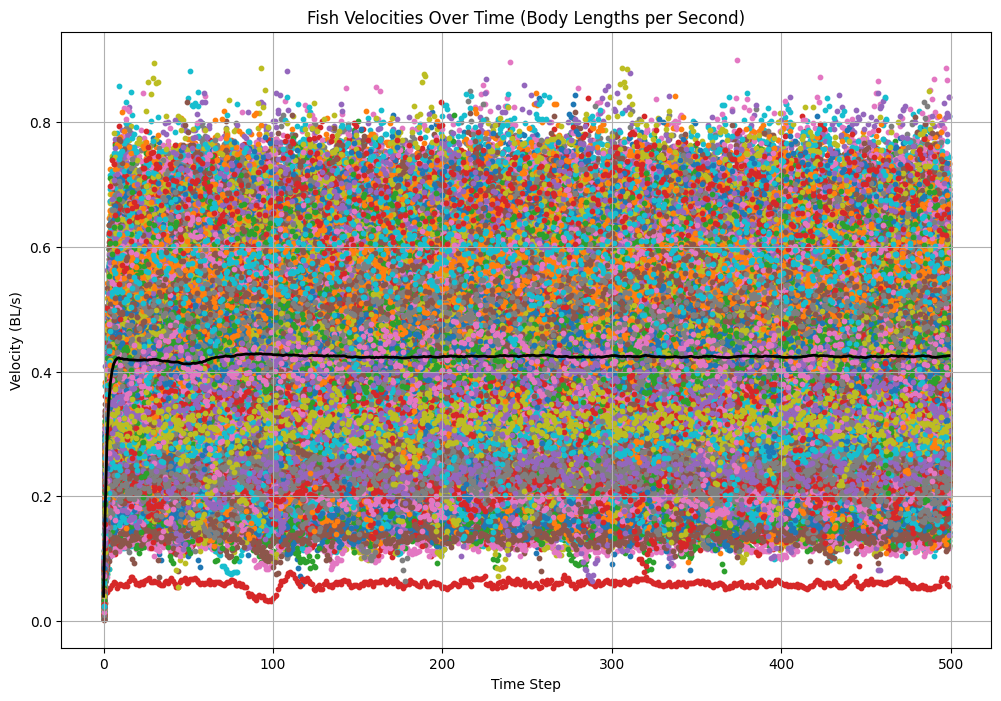

In [236]:
#Model data, induvidual and average velocity of fish over time
#3000 fish. 500 timesteps. 50% free will, afternoon
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\density_testing.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
#plt.legend(loc='upper right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)
plt.show()

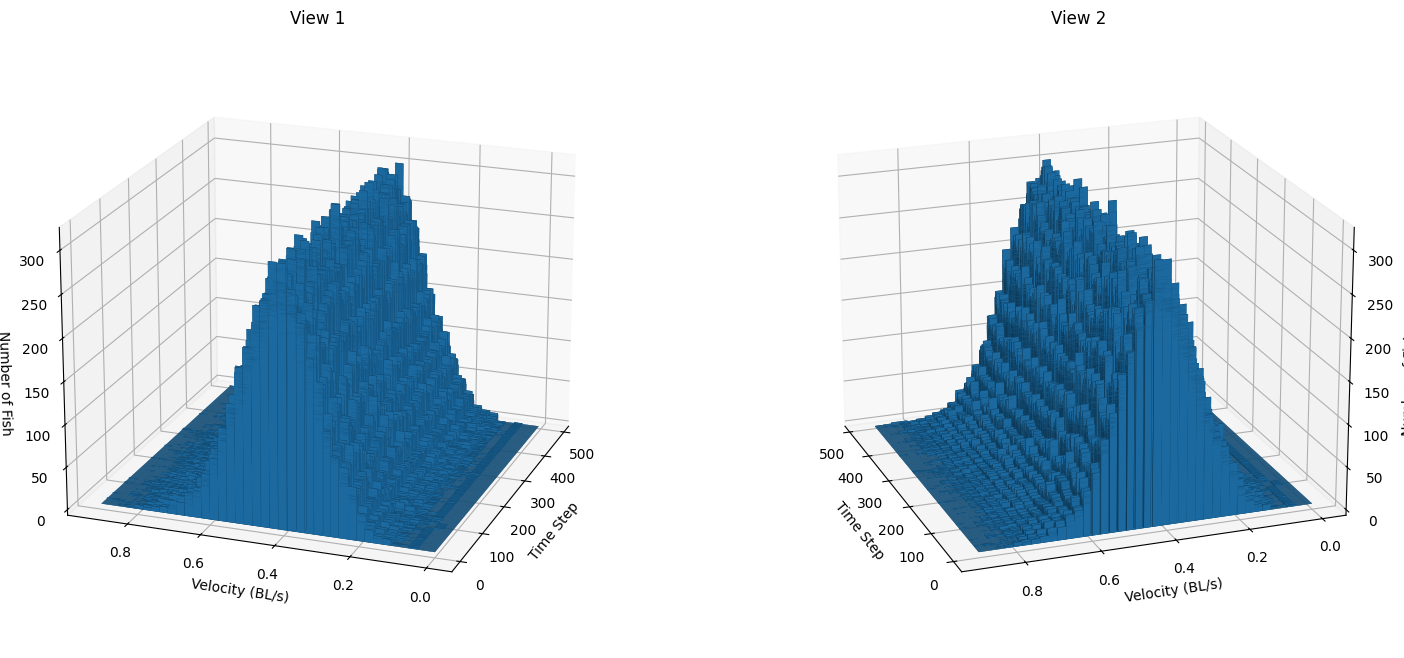

In [237]:
#3000 fish. 500 timesteps. 50% free will, afternoon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\density_testing.csv')

#Filter out the first 10 time steps
fish_data = fish_data[fish_data['time_step'] > 10]

# Compute velocity magnitudes and convert to body lengths per second
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

# Define velocity bins ensuring they reflect the actual data range
velocity_bins = np.linspace(0, fish_data['velocity_bl_s'].max(), num=40)

# Create and plot the histogram
hist3d = np.zeros((len(velocity_bins)-1, len(fish_data['time_step'].unique())))

for i, step in enumerate(fish_data['time_step'].unique()):
    hist, _ = np.histogram(fish_data[fish_data['time_step'] == step]['velocity_bl_s'], bins=velocity_bins)
    hist3d[:, i] = hist

# Setting up the figure and axes
fig = plt.figure(figsize=(18, 8))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
x_pos, y_pos = np.meshgrid(range(len(fish_data['time_step'].unique())), velocity_bins[:-1])
ax1.bar3d(x_pos.ravel(), y_pos.ravel(), np.zeros_like(x_pos).ravel(), 1, velocity_bins[1] - velocity_bins[0], hist3d.ravel())
ax1.view_init(elev=20, azim=200)
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Velocity (BL/s)')
ax1.set_zlabel('Number of Fish')
ax1.set_title('View 1')

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.bar3d(x_pos.ravel(), y_pos.ravel(), np.zeros_like(x_pos).ravel(), 1, velocity_bins[1] - velocity_bins[0], hist3d.ravel())
ax2.view_init(elev=20, azim=160)
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Velocity (BL/s)')
ax2.set_zlabel('Number of Fish')
ax2.set_title('View 2')

plt.show() 

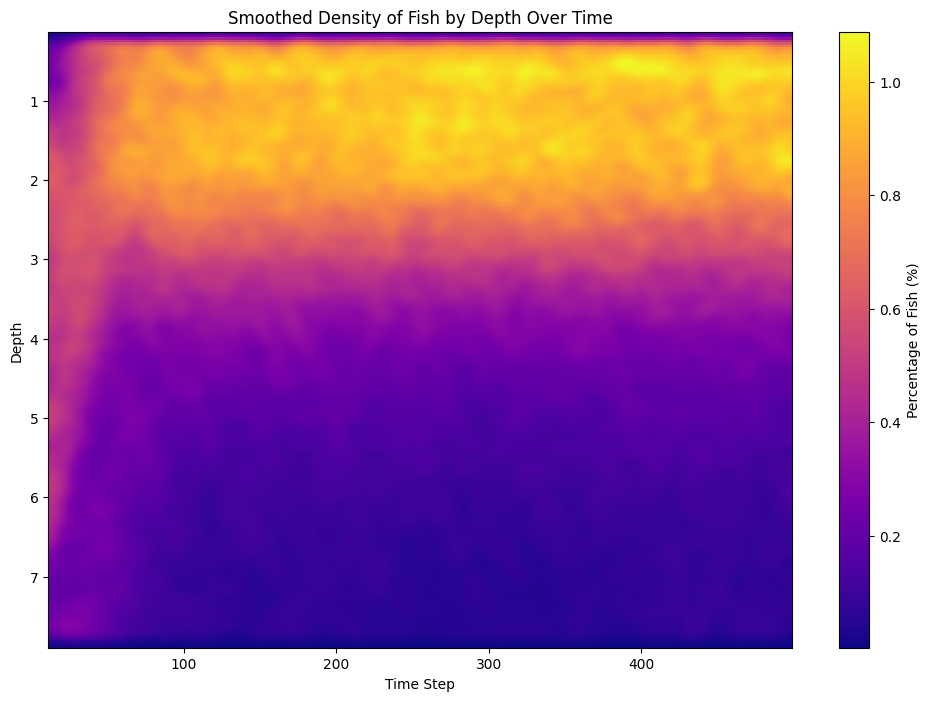

In [248]:
#3000 fish. 500 timesteps. 50% free will, morning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\density50_morning.csv')

# Filter out the first 10 time steps
fish_data = fish_data[fish_data['time_step'] > 10]

# Define depth bins
depth_bins = np.linspace(fish_data['pos_z'].min(), fish_data['pos_z'].max(), num=240)

# Create histogram data and normalize it to percentage
hist2d = np.zeros((len(depth_bins)-1, len(fish_data['time_step'].unique())))
time_steps = sorted(fish_data['time_step'].unique())

for i, step in enumerate(time_steps):
    hist, _ = np.histogram(fish_data[fish_data['time_step'] == step]['pos_z'], bins=depth_bins)
    total_count = hist.sum()
    hist2d[:, i] = (hist / total_count) * 100  # Convert counts to percentage

# Apply Gaussian smoothing
smoothed_hist2d = gaussian_filter(hist2d, sigma=[2, 5])  # Adjust sigma for smoothing depth and time

# Plotting as a smoothed heatmap
fig, ax = plt.subplots(figsize=(12, 8))
c = ax.imshow(smoothed_hist2d, aspect='auto', interpolation='nearest', origin='lower', extent=[fish_data['time_step'].min(), fish_data['time_step'].max(), depth_bins.min(), depth_bins.max()], cmap='plasma')
ax.invert_yaxis()
fig.colorbar(c, ax=ax, label='Percentage of Fish (%)')

ax.set_xlabel('Time Step')
ax.set_ylabel('Depth')
ax.set_title('Smoothed Density of Fish by Depth Over Time')
plt.show()

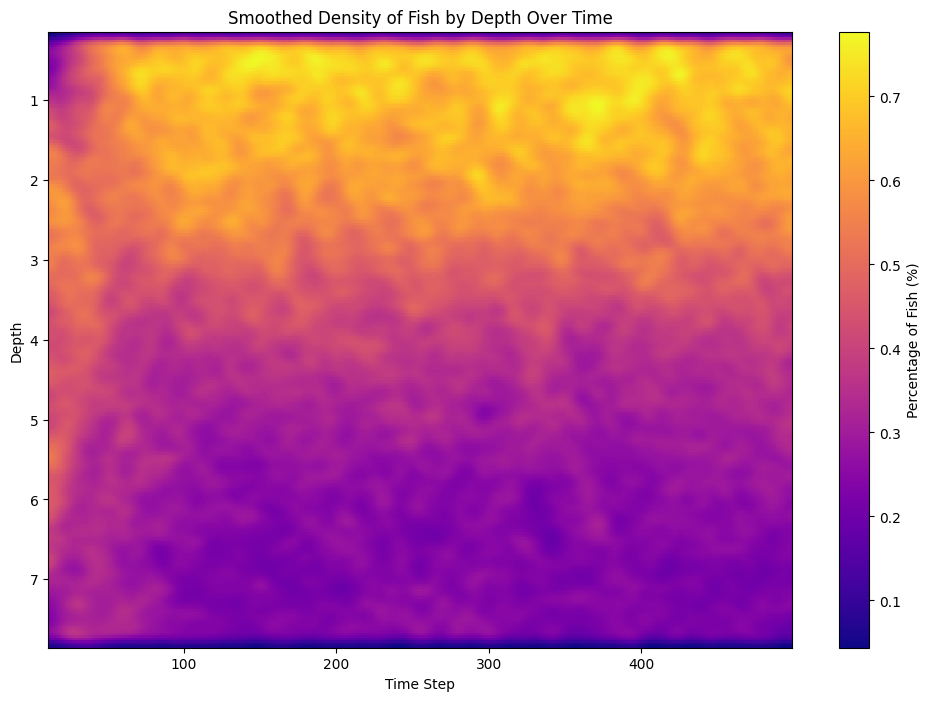

In [249]:
#3000 fish. 500 timesteps. 80% free will, morning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\density80_morning.csv')

# Filter out the first 10 time steps
fish_data = fish_data[fish_data['time_step'] > 10]

# Define depth bins
depth_bins = np.linspace(fish_data['pos_z'].min(), fish_data['pos_z'].max(), num=240)

# Create histogram data and normalize it to percentage
hist2d = np.zeros((len(depth_bins)-1, len(fish_data['time_step'].unique())))
time_steps = sorted(fish_data['time_step'].unique())

for i, step in enumerate(time_steps):
    hist, _ = np.histogram(fish_data[fish_data['time_step'] == step]['pos_z'], bins=depth_bins)
    total_count = hist.sum()
    hist2d[:, i] = (hist / total_count) * 100  # Convert counts to percentage

# Apply Gaussian smoothing
smoothed_hist2d = gaussian_filter(hist2d, sigma=[2, 5])  # Adjust sigma for smoothing depth and time

# Plotting as a smoothed heatmap
fig, ax = plt.subplots(figsize=(12, 8))
c = ax.imshow(smoothed_hist2d, aspect='auto', interpolation='nearest', origin='lower', extent=[fish_data['time_step'].min(), fish_data['time_step'].max(), depth_bins.min(), depth_bins.max()], cmap='plasma')
ax.invert_yaxis()
fig.colorbar(c, ax=ax, label='Percentage of Fish (%)')

ax.set_xlabel('Time Step')
ax.set_ylabel('Depth')
ax.set_title('Smoothed Density of Fish by Depth Over Time')
plt.show()

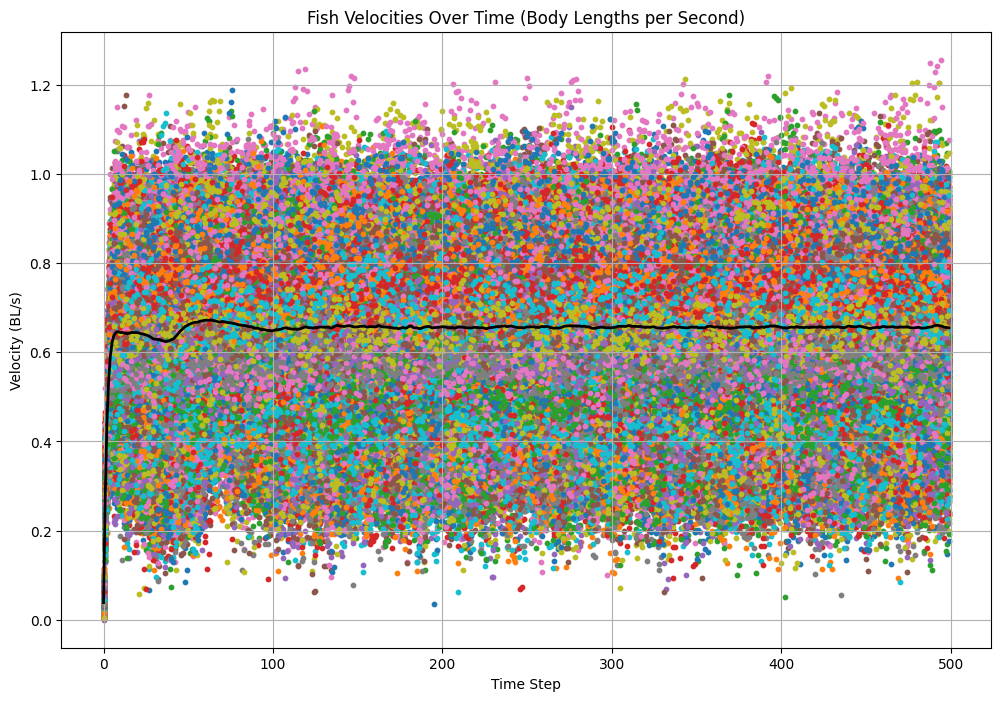

In [250]:
#Model data, induvidual and average velocity of fish over time
#3000 fish. 500 timesteps. 80% free will, morning
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\density80_morning.csv')

#Compute velocity magnitudes and add it as a new column
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)

#Velocity to body lengths per second
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

average_velocity_per_step_bl_s = fish_data.groupby('time_step')['velocity_bl_s'].mean()

# Plotting the individual velocities
plt.figure(figsize=(12, 8))
for key, grp in fish_data.groupby(['fish_id']):
    plt.scatter(grp['time_step'], grp['velocity_bl_s'], label=f'Fish{key}', s=10)  

#Plotting the average velocity per time step
plt.plot(average_velocity_per_step_bl_s, color='k', linewidth=2, label='Average Velocity')

plt.title('Fish Velocities Over Time (Body Lengths per Second)')
plt.xlabel('Time Step')
plt.ylabel('Velocity (BL/s)')
plt.grid(True)
#plt.legend(loc='upper right', fontsize='small', title="Legend", title_fontsize='small', ncol=2)

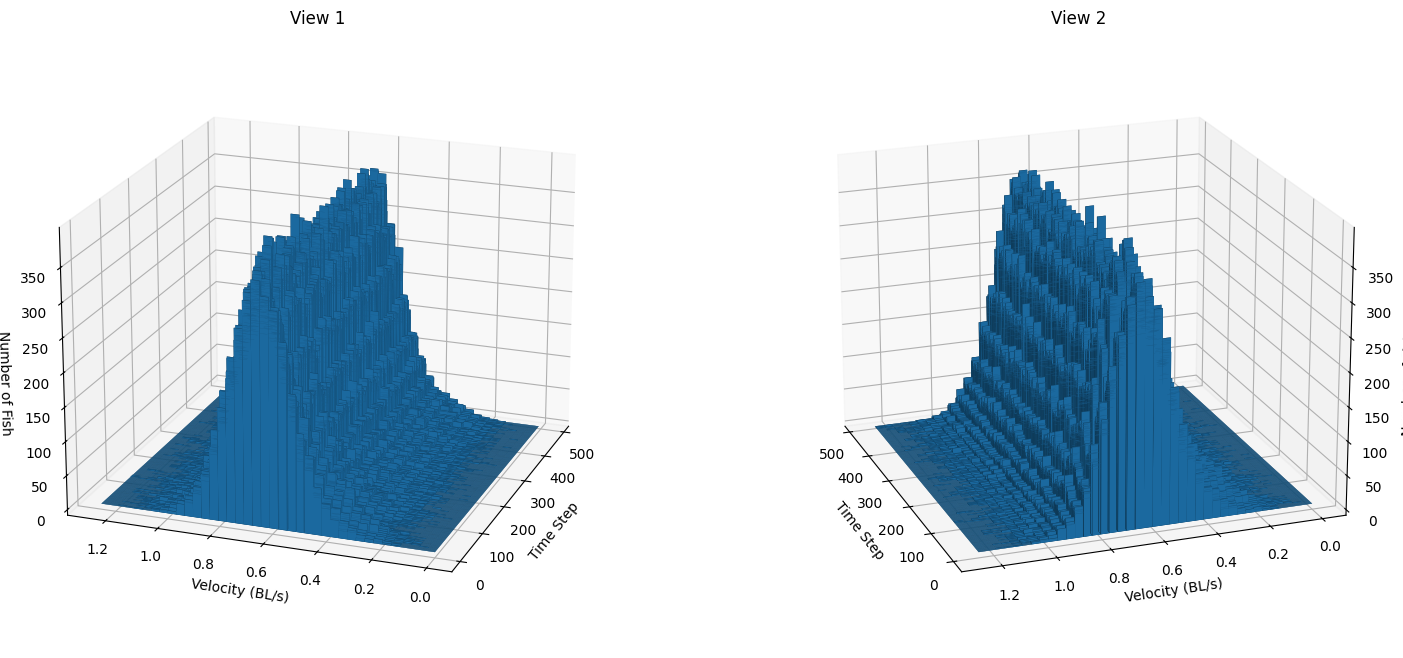

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Load the data
fish_data = pd.read_csv(r'C:\Users\Mathiako\OneDrive - NTNU\Documents\Master Mathias\Master\Simulation_data\density80_morning.csv')

#Filter out the first 10 time steps
fish_data = fish_data[fish_data['time_step'] > 10]

# Compute velocity magnitudes and convert to body lengths per second
fish_data['velocity_magnitude'] = np.sqrt(fish_data['vel_x']**2 + fish_data['vel_y']**2 + fish_data['vel_z']**2)
fish_data['velocity_bl_s'] = fish_data['velocity_magnitude'] / fish_data['fish_size']

# Define velocity bins ensuring they reflect the actual data range
velocity_bins = np.linspace(0, fish_data['velocity_bl_s'].max(), num=40)

# Create and plot the histogram
hist3d = np.zeros((len(velocity_bins)-1, len(fish_data['time_step'].unique())))

for i, step in enumerate(fish_data['time_step'].unique()):
    hist, _ = np.histogram(fish_data[fish_data['time_step'] == step]['velocity_bl_s'], bins=velocity_bins)
    hist3d[:, i] = hist

# Setting up the figure and axes
fig = plt.figure(figsize=(18, 8))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
x_pos, y_pos = np.meshgrid(range(len(fish_data['time_step'].unique())), velocity_bins[:-1])
ax1.bar3d(x_pos.ravel(), y_pos.ravel(), np.zeros_like(x_pos).ravel(), 1, velocity_bins[1] - velocity_bins[0], hist3d.ravel())
ax1.view_init(elev=20, azim=200)
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Velocity (BL/s)')
ax1.set_zlabel('Number of Fish')
ax1.set_title('View 1')

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.bar3d(x_pos.ravel(), y_pos.ravel(), np.zeros_like(x_pos).ravel(), 1, velocity_bins[1] - velocity_bins[0], hist3d.ravel())
ax2.view_init(elev=20, azim=160)
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Velocity (BL/s)')
ax2.set_zlabel('Number of Fish')
ax2.set_title('View 2')

plt.show() 